In [1]:
from rasterio.crs import CRS
#import rioxarray as rxr
#import rasterio
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#from rasterio.plot import show
#from rasterio.enums import Resampling

#import rioxarray

import gstools as gs
import pykrige
import statsmodels.api as sm

In [2]:
JBC22SH = gpd.read_file('/home/francis/Documents/programmation/Qgis/SMP_spatial/JBC_20220119/JBC_20220119_snowprop.shp')
JBC22SH

,point_id,utm_n,utm_e,ellips_hei,ortho_heig,utm_z,collection,collecti_1,solution s,lateral rm,...,P_slab,E_slab,D_slab,D_ml_slab,D_wl,G_wl,tp,Pwl,L,geometry
0,Point 9,5.676137e+06,451204.027590,1825.972317,1842.641,utm11,2022-01-19 20:53:00 UTC,2022-01-19 20:53:06 UTC,FIX,0.0035,...,191.118899,2.127951,0.401,0.421633,0.0425,0.515008,775.545116,186.268613,0.307214,POINT (451204.028 5676137.024)
1,Point 10,5.676141e+06,451204.269374,1825.527140,1842.196,utm11,2022-01-19 20:54:59 UTC,2022-01-19 20:55:04 UTC,FIX,0.0040,...,191.921725,2.398293,0.397,0.438312,0.0505,0.487766,707.904085,184.353515,0.281819,POINT (451204.269 5676140.941)
2,Point 11,5.676148e+06,451204.892672,1828.648260,1845.317,utm11,2022-01-19 21:00:18 UTC,2022-01-19 21:00:28 UTC,FLOAT,0.0198,...,187.361118,2.085518,0.410,0.466229,0.0435,0.419593,718.858486,183.028155,0.288899,POINT (451204.893 5676147.712)
3,Point 12,5.676150e+06,451204.650933,1828.309744,1844.978,utm11,2022-01-19 21:01:11 UTC,2022-01-19 21:01:19 UTC,FLOAT,0.0135,...,179.521717,1.668190,0.407,0.453545,0.0415,0.415069,637.203346,177.889362,0.278800,POINT (451204.651 5676149.552)
4,Point 13,5.676143e+06,451203.897396,1828.042157,1844.711,utm11,2022-01-19 21:02:07 UTC,2022-01-19 21:02:21 UTC,FLOAT,0.0400,...,185.851035,2.184624,0.395,0.425756,0.0435,0.547889,634.202586,181.184621,0.267613,POINT (451203.897 5676142.966)
5,Point 14,5.676144e+06,451201.650662,1827.191421,1843.860,utm11,2022-01-19 21:04:22 UTC,2022-01-19 21:04:36 UTC,FLOAT,0.0446,...,188.818624,2.427671,0.406,0.447459,0.0455,0.551473,741.962866,186.945443,0.274705,POINT (451201.651 5676144.430)
6,Point 15,5.676146e+06,451200.805301,1827.594683,1844.263,utm11,2022-01-19 21:05:06 UTC,2022-01-19 21:05:18 UTC,FLOAT,0.0302,...,188.638925,2.397206,0.398,0.443071,0.0415,0.541808,717.527026,183.785532,0.295102,POINT (451200.805 5676146.217)
7,Point 16,5.676147e+06,451198.686537,1829.049585,1845.718,utm11,2022-01-19 21:06:10 UTC,2022-01-19 21:06:23 UTC,FLOAT,0.0085,...,190.615311,2.525523,0.397,0.429189,0.0435,0.581930,683.320245,181.805561,0.282984,POINT (451198.687 5676147.384)
8,Point 17,5.676144e+06,451198.941617,1828.674925,1845.343,utm11,2022-01-19 21:06:47 UTC,2022-01-19 21:07:04 UTC,FLOAT,0.0212,...,191.862336,2.568077,0.404,0.444634,0.0405,0.569280,697.867346,185.961473,0.269227,POINT (451198.942 5676143.959)
9,Point 18,5.676141e+06,451199.219617,1828.788990,1845.458,utm11,2022-01-19 21:07:46 UTC,2022-01-19 21:07:56 UTC,FLOAT,0.0098,...,188.749975,2.152225,0.394,0.464613,0.0385,0.451309,671.675123,180.444099,0.283135,POINT (451199.220 5676141.131)


## Estimer le variogramme ou créer le variogramme expérimental

In [3]:
# Aller chercher les coordonnées x et y de votre shpfile
# Elles doivent être en utm car nous allons calculer la distance euclidienne
x = np.array(JBC22SH['geometry'].get_coordinates()['x'])
y = np.array(JBC22SH['geometry'].get_coordinates()['y'])
posi = np.array([x,y])
posi = np.transpose(posi)

slab = np.array(JBC22SH['D_slab'])

/home/francis/anaconda3/envs/geo71021/lib/python3.11/site-packages/gstools/covmodel/plot.py:121: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


{'Gaussian': 0.32359680789490286, 'Exponential': 0.40258473165645636, 'Matern': 0.31978561989947574, 'Stable': 0.40034110674933077, 'Rational': 0.3257474197304695, 'Circular': 0.46049590998773915, 'Spherical': 0.4499033257092224, 'SuperSpherical': 0.4511016198986685, 'JBessel': 0.2761662522959135}


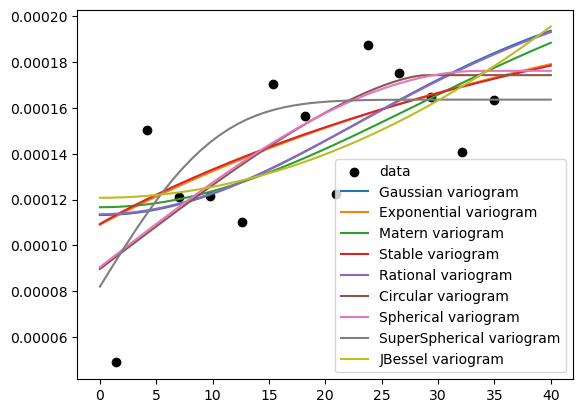

In [4]:
# Estimer le variogramme expérimentale avec la librairie gstools
bin_center, gamma = gs.vario_estimate((x, y), slab)

# Testons différents modèles théorique de variogrmme
models = {
    "Gaussian": gs.Gaussian,
    "Exponential": gs.Exponential,
    "Matern": gs.Matern,
    "Stable": gs.Stable,
    "Rational": gs.Rational,
    "Circular": gs.Circular,
    "Spherical": gs.Spherical,
    "SuperSpherical": gs.SuperSpherical,
    "JBessel": gs.JBessel,
}

scores = {}

# plot the estimated variogram
plt.scatter(bin_center, gamma, color="k", label="data")
ax = plt.gca()

# fittons tous nos modèles de variogrammes et gardons en mémoire le R2 pour voir le meilleur
for model in models:
    fit_model = models[model](dim=2)
    para, pcov, r2 = fit_model.fit_variogram(bin_center, gamma, return_r2=True)
    fit_model.plot(x_max=40, ax=ax)
    scores[model] = r2
print(scores)

In [5]:
#Afficher le meilleur R2
ranking = sorted(scores.items(), key=lambda item: item[1], reverse=True)
print("RANKING by Pseudo-r2 score")
for i, (model, score) in enumerate(ranking, 1):
    print(f"{i:>6}. {model:>15}: {score:.5}")

plt.show()

RANKING by Pseudo-r2 score
     1.        Circular: 0.4605
     2.  SuperSpherical: 0.4511
     3.       Spherical: 0.4499
     4.     Exponential: 0.40258
     5.          Stable: 0.40034
     6.        Rational: 0.32575
     7.        Gaussian: 0.3236
     8.          Matern: 0.31979
     9.         JBessel: 0.27617


In [6]:
fit_spherical = gs.Spherical(dim=2)
para, pcov, r2 = fit_spherical.fit_variogram(bin_center, gamma, return_r2=True)
print(fit_spherical)

Spherical(dim=2, var=8.57e-05, len_scale=33.8, nugget=9.05e-05)


## Regression linéaire multiple avec LASSO

In statistics and machine learning, lasso (least absolute shrinkage and selection operator; also Lasso or LASSO) is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the resulting statistical model.

source: wikipedia

In [7]:

from sklearn.linear_model import LassoLarsIC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

In [8]:
D = JBC22SH['D_slab' ] #variable qu'on veut prédire
#X = JBC22SH.loc[:, ['TRI','convexity','tpi2550','dist_canop']]
X_columns = ['slope','tpi515','tpi2550','dist_canop','pot_rad','convexity','TRI','VRM25','VRM15','VRM5','canopy_hei','winstral_C','snowslope','snowdepth']
X = JBC22SH.loc[:, 'slope':'snowdepth']
print(np.array(X).shape)

(53, 14)


In [9]:
results = sm.OLS(D, X).fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                 D_slab   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                              3103.
Date:                Wed, 15 Nov 2023   Prob (F-statistic):                    7.61e-55
Time:                        11:38:58   Log-Likelihood:                          159.76
No. Observations:                  53   AIC:                                     -291.5
Df Residuals:                      39   BIC:                                     -263.9
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## LASSO Regression

In [10]:
#start_time = time.time()
lasso_lars_ic = make_pipeline(StandardScaler(), LassoLarsIC(criterion="aic")).fit(X, D)
#fit_time = time.time() - start_time

In [11]:
# On fait la procedure LASSO pour trouver le bon alpha qui minimise l'AIC
results = pd.DataFrame(
    {
        "alphas": lasso_lars_ic[-1].alphas_,
        "AIC criterion": lasso_lars_ic[-1].criterion_,
    }
).set_index("alphas")
alpha_aic = lasso_lars_ic[-1].alpha_
results

,AIC criterion
alphas,
0.003744,-317.380795
0.003728,-315.427209
0.002751,-317.925988
0.002398,-317.755005
0.001453,-320.861272
0.001375,-319.232624
0.001298,-317.917148
0.001173,-317.035858
0.000812,-317.870326


In [12]:
# On fit notre LASSO regression avec le meilleur alpha
lasso_best = Lasso(alpha = alpha_aic)
lasso_best.fit(X,D)

# on crée un dataframe avec coef LASSO pour voir il utilise lesquels
feature = pd.DataFrame({
    'variable':X_columns,
    'coef':lasso_best.coef_
})
feature


,variable,coef
0,slope,0.000149
1,tpi515,0.000000
2,tpi2550,0.000254
3,dist_canop,-0.001170
4,pot_rad,0.000000
5,convexity,-0.002706
6,TRI,-0.000000
7,VRM25,0.000000
8,VRM15,-0.000000
9,VRM5,-0.000000


## Préparation des données de prédiction

J'utilise une fonction pour lire tous mes raster de prédictions

Ensuite, je vais les reprojeter entre eux pour avoir la même résolution et extent.

Je vais stocker le tout dans un dictionnaire nommer raster_stack

In [13]:
# fonction modifié pour resample au 50cm de resolution avec rioxarray
def get_raster(slope_path, tpi515_path, tpi2550_path, dist_cano_path, rad_path, conv_path, tri_path, vrm25_path, vrm15_path, vrm5_path, cano_path, Cx_path,**kwargs):
    rock_path = kwargs.get('rock_path', None)
    snowslope_path = kwargs.get('snowslope_path', None)
    snowdepth_path = kwargs.get('snowdepth_path', None)
    
    d_raster = {}
    
    #input de slope
    raster_slope = rioxarray.open_rasterio(slope_path, masked = True)
    print('slope raster:', raster_slope.rio.crs)
    d_raster.update({'slope': raster_slope})
    
    #input de TPI
    raster_tpi515 = rioxarray.open_rasterio(tpi515_path, masked = True)
    print('tpi515 raster:', raster_tpi515.rio.crs)
    d_raster.update({'tpi515': raster_tpi515})
    
    #input de TPI
    raster_tpi2550 = rioxarray.open_rasterio(tpi2550_path, masked = True)
    print('tpi2550 raster:', raster_tpi2550.rio.crs)
    d_raster.update({'tpi2550': raster_tpi2550})
    
    #input de distance to canopy
    raster_distcano = rioxarray.open_rasterio(dist_cano_path, masked = True)
    print('distance to canopy raster:', raster_distcano.rio.crs)
    d_raster.update({'dist_canop': raster_distcano})
    
    #input de radiation
    raster_rad = rioxarray.open_rasterio(rad_path, masked = True)
    print('potential radiation incoming raster:', raster_rad.rio.crs)
    d_raster.update({'pot_rad': raster_rad})
    
    #input de wind effect
    #raster_wind = rioxarray.open_rasterio(wind_path, masked = True)
    #print('wind effect raster:', raster_wind.rio.crs)
    #d_raster.update({'wind_effect': raster_wind})

    #input de convexity
    raster_conv = rioxarray.open_rasterio(conv_path, masked = True)
    print('Convexity raster:', raster_conv.rio.crs)
    d_raster.update({'convexity': raster_conv})

    #input de Terrain ruggedness index
    raster_tri = rioxarray.open_rasterio(tri_path, masked = True)
    print('TRI raster:', raster_tri.rio.crs)
    d_raster.update({'TRI': raster_tri})
    
    #input de vector ruggedness index scale 25m
    raster_vrm25 = rioxarray.open_rasterio(vrm25_path, masked = True)
    print('VRM25 raster:', raster_vrm25.rio.crs)
    d_raster.update({'VRM25': raster_vrm25})
    
    #input de vector ruggedness index scale 15m
    raster_vrm15 = rioxarray.open_rasterio(vrm15_path, masked = True)
    print('VRM15 raster:', raster_vrm15.rio.crs)
    d_raster.update({'VRM15': raster_vrm15})
    
    #input de vector ruggedness index scale 5m
    raster_vrm5 = rioxarray.open_rasterio(vrm5_path, masked = True)
    print('VRM5 raster:', raster_vrm5.rio.crs)
    d_raster.update({'VRM5': raster_vrm5})

    #input de canopy
    raster_cano = rioxarray.open_rasterio(cano_path, masked = True)
    print('Canopy height raster:', raster_cano.rio.crs)
    d_raster.update({'canopy_hei': raster_cano})
    
    #input de winstral_Cx
    raster_Cx = rioxarray.open_rasterio(Cx_path, masked = True)
    print('Winstral_Cx raster:', raster_Cx.rio.crs)
    d_raster.update({'winstral_C': raster_Cx})

    #input de distance to rockwall
    if rock_path == None:
        print('no rockwall raster')
    else:
        raster_rock = rioxarray.open_rasterio(rock_path, masked = True)
        print('Distance to rockwall raster:', raster_rock.rio.crs)
        d_raster.update({'distance_rock':raster_rock})

    #input de snowslope
    if snowslope_path == None:
        print('no snowslope raster')
    else:
        raster_snowslope = rioxarray.open_rasterio(snowslope_path, masked = True)
        print('Snowslope raster:', raster_snowslope.rio.crs)
        d_raster.update({'snowslope': raster_snowslope})
    
    #input de snowdepth
    if snowdepth_path == None:
        print('no snowdepth raster')
    else:
        raster_snowdepth = rioxarray.open_rasterio(snowdepth_path, masked = True)
        print('Snowdepth raster:', raster_snowdepth.rio.crs)
        d_raster.update({'snowdepth': raster_snowdepth})

    res = raster_snowdepth.rio.resolution() # get the resolution of the RasterArray
    # resample data to target shape
    print('resolution ',res[0])
    upscale_factor = res[0]/0.5 #on s'en va vers une résolution de 0.5m
    print('upscale_factor',upscale_factor)
    new_width = int(raster_snowdepth.rio.width * upscale_factor)
    new_height = int(raster_snowdepth.rio.height * upscale_factor)

    snow_mask = raster_snowdepth.rio.reproject(raster_snowdepth.rio.crs, shape = (new_height, new_width), resampling = Resampling.cubic)
        
    #création d'un dictionnaire vide pour stocker les values des rasters associés à chaque points
    d_raster_resamp = {}
    
    #for loop qui parcours le dictionnaire des rasters 
    for key,xdr in d_raster.items():
        
        res = xdr.rio.resolution() # get the resolution of the RasterArray
        # resample data to target shape
        print('resolution ',res[0])

        xdr_resamp = xdr.rio.reproject_match(snow_mask) # On va match la res et l'extent de snowmask
        print(xdr_resamp.rio.resolution())
        d_raster_resamp.update({str(key):xdr_resamp})
        
    return d_raster_resamp # retourne une geopandas dataframe

In [14]:
# définition des path
point_shpfile = '/home/francis/Documents/UQAR/PhD/données/RogersPass_jan22/JBC_20220119/GNSS/JBC_20220119_final.shp'
crs_epsg_point = 26911
slope_path = '/home/francis/Documents/programmation/Qgis/terrain_analysis/slope/JBC_slope.tif'
tpi515_path = '/home/francis/Documents/programmation/Qgis/terrain_analysis/TPI/TPI_JBC515.sdat'
tpi2550_path = '/home/francis/Documents/programmation/Qgis/terrain_analysis/TPI/TPI_JBC2550.sdat'
dist_cano_path = '/home/francis/Documents/programmation/Qgis/terrain_analysis/proximity/DISTANCE_JBC.sdat'
rad_path = '/home/francis/Documents/programmation/Qgis/terrain_analysis/sky_view/raddirect_JBC.sdat'
conv_path = '/home/francis/Documents/programmation/Qgis/terrain_analysis/convexity/convexity_JBC.sdat'
tri_path = '/home/francis/Documents/programmation/Qgis/terrain_analysis/TRI/TRI_JBC.sdat'
vrm25_path = '/home/francis/Documents/programmation/Qgis/terrain_analysis/VRM/VRM_JBC_25m.sdat'
vrm15_path = '/home/francis/Documents/programmation/Qgis/terrain_analysis/VRM/VRM_JBC_15m.sdat'
vrm5_path = '/home/francis/Documents/programmation/Qgis/terrain_analysis/VRM/VRM_JBC_5m.sdat'
cano_path = '/home/francis/Documents/programmation/Qgis/terrain_analysis/canopy/canopy_JBC.tif'
Cx_path = '/home/francis/Documents/programmation/Qgis/terrain_analysis/winstral_Sx/JBC_Sx_R100_W315.tif'

snowslope_path = '/home/francis/Documents/programmation/Qgis/SMP_spatial/JBC_20220119/JBC_20220119_snowslope.sdat'
snowdepth_path = '/home/francis/Documents/programmation/Qgis/terrain_analysis/snowdepth/JBC_20220119_snowdepthTEST.tif'

raster_stack = get_raster(slope_path, tpi515_path,tpi2550_path, dist_cano_path, rad_path, conv_path, tri_path, vrm25_path, vrm15_path, vrm5_path, cano_path, Cx_path, snowslope_path = snowslope_path, snowdepth_path = snowdepth_path)

slope raster: EPSG:26911
tpi515 raster: EPSG:26911
tpi2550 raster: EPSG:26911
distance to canopy raster: EPSG:26911
potential radiation incoming raster: EPSG:26911
Convexity raster: EPSG:26911
TRI raster: EPSG:26911
VRM25 raster: EPSG:26911
VRM15 raster: EPSG:26911
VRM5 raster: EPSG:26911
Canopy height raster: EPSG:26911
Winstral_Cx raster: EPSG:26911
no rockwall raster
Snowslope raster: EPSG:26911
Snowdepth raster: EPSG:26911
resolution  0.05073889763779015
upscale_factor 0.1014777952755803
resolution  0.5
(0.5016162868074411, -0.5004700351735217)
resolution  0.5
(0.5016162868074411, -0.5004700351735217)
resolution  0.5
(0.5016162868074411, -0.5004700351735217)
resolution  1.0
(0.5016162868074411, -0.5004700351735217)
resolution  0.5
(0.5016162868074411, -0.5004700351735217)
resolution  0.5
(0.5016162868074411, -0.5004700351735217)
resolution  0.5
(0.5016162868074411, -0.5004700351735217)
resolution  0.5
(0.5016162868074411, -0.5004700351735217)
resolution  0.5
(0.5016162868074411, -0

In [15]:
# on construit un énorme dataframe de prédiction avec les coord et nos variables de prédictions
df_final = pd.DataFrame()

#Je vais looper à travers mon dictionnaire de raster pour contruire mon dataframe
for key,xdr in raster_stack.items():
    xdr = xdr.squeeze().drop("spatial_ref").drop("band")
    xdr.name = str(key)
    df_temp = xdr.to_dataframe().reset_index()
    if key == 'slope':
        df_final = pd.concat([df_final,df_temp], axis = 1)
    else:
        df_final = pd.concat([df_final,df_temp[str(key)]], axis = 1)
        
df_final = df_final.dropna()
df_final

,y,x,slope,tpi515,tpi2550,dist_canop,pot_rad,convexity,TRI,VRM25,VRM15,VRM5,canopy_hei,winstral_C,snowslope,snowdepth
346,5.676243e+06,451153.604674,16.154917,-0.236228,10.200370,8.062258,0.042547,41.301285,1.162274,0.079400,0.066747,0.038375,0.672607,0.720385,3.022312,5.919800
347,5.676243e+06,451154.106290,15.415101,-0.172202,10.058215,7.615773,0.047644,41.479450,1.165495,0.081058,0.068157,0.040763,0.771729,0.567571,3.022312,5.903809
348,5.676243e+06,451154.607906,15.525641,-0.085230,9.932994,7.615773,0.051874,41.669712,1.160346,0.083058,0.069278,0.042074,0.859619,0.675990,6.874018,6.062256
349,5.676243e+06,451155.109522,16.148682,0.002162,9.804865,7.000000,0.043807,41.872059,1.156887,0.085041,0.070523,0.043371,0.967041,0.752747,6.874018,6.328979
350,5.676243e+06,451155.611139,17.412462,0.133954,9.716013,7.000000,0.046203,42.086487,1.136931,0.086637,0.072019,0.046484,1.067871,-0.995740,11.594005,5.592529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47388,5.676102e+06,451211.290547,16.502419,-0.121142,-10.213556,0.000000,0.000000,48.106770,1.894463,0.141471,0.154696,0.161442,5.395508,-1.264513,24.538574,1.522339
47389,5.676102e+06,451211.792163,16.004526,-0.047006,-10.380157,0.000000,0.000013,48.150520,1.887621,0.139595,0.154241,0.159393,6.800781,-1.015623,24.546547,1.546021
47390,5.676102e+06,451212.293779,28.850019,0.026594,-10.540312,0.000000,0.006956,48.196274,1.887436,0.138057,0.153795,0.156686,4.121094,0.455175,24.546547,3.290894
47391,5.676102e+06,451212.795395,57.517181,-0.159008,-10.950765,1.000000,0.011732,48.242962,1.788002,0.136430,0.152855,0.153824,0.156860,0.696381,22.959482,4.465942


## Input final de ma fonction de krigeage
J'ai besoin d'un numpy array de coordonnées et d'un numpy array avec l'ensemble de mes variables de prédiction


In [16]:
# On sélectionne les coordonnées x et y de notre dataframe prédiction
posi_pred = np.array([df_final['x'],df_final['y']])
posi_pred = np.transpose(posi_pred)
print(posi_pred.shape)

# On sélectionne l'ensemble des variables que j'ai utilisé pour construire mon modèle
pred = df_final.loc[:, 'slope':] # à partir de la colonne slope jusqu'à la fin
print(pred.shape)
pred

(40728, 2)
(40728, 14)


,slope,tpi515,tpi2550,dist_canop,pot_rad,convexity,TRI,VRM25,VRM15,VRM5,canopy_hei,winstral_C,snowslope,snowdepth
346,16.154917,-0.236228,10.200370,8.062258,0.042547,41.301285,1.162274,0.079400,0.066747,0.038375,0.672607,0.720385,3.022312,5.919800
347,15.415101,-0.172202,10.058215,7.615773,0.047644,41.479450,1.165495,0.081058,0.068157,0.040763,0.771729,0.567571,3.022312,5.903809
348,15.525641,-0.085230,9.932994,7.615773,0.051874,41.669712,1.160346,0.083058,0.069278,0.042074,0.859619,0.675990,6.874018,6.062256
349,16.148682,0.002162,9.804865,7.000000,0.043807,41.872059,1.156887,0.085041,0.070523,0.043371,0.967041,0.752747,6.874018,6.328979
350,17.412462,0.133954,9.716013,7.000000,0.046203,42.086487,1.136931,0.086637,0.072019,0.046484,1.067871,-0.995740,11.594005,5.592529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47388,16.502419,-0.121142,-10.213556,0.000000,0.000000,48.106770,1.894463,0.141471,0.154696,0.161442,5.395508,-1.264513,24.538574,1.522339
47389,16.004526,-0.047006,-10.380157,0.000000,0.000013,48.150520,1.887621,0.139595,0.154241,0.159393,6.800781,-1.015623,24.546547,1.546021
47390,28.850019,0.026594,-10.540312,0.000000,0.006956,48.196274,1.887436,0.138057,0.153795,0.156686,4.121094,0.455175,24.546547,3.290894
47391,57.517181,-0.159008,-10.950765,1.000000,0.011732,48.242962,1.788002,0.136430,0.152855,0.153824,0.156860,0.696381,22.959482,4.465942


# Kriging
Le krigeage est une méthode d'interpolation spatiale qui se base sur des observations.

L'interpolation est fait en utilisant deux fonction:

    1) Déterministe y = ax + b (Régression linéaire multiple)
    2) Probabiliste fonction de covariance

L'interpolation "essaye" de fitter ou conditionner sur les observations.
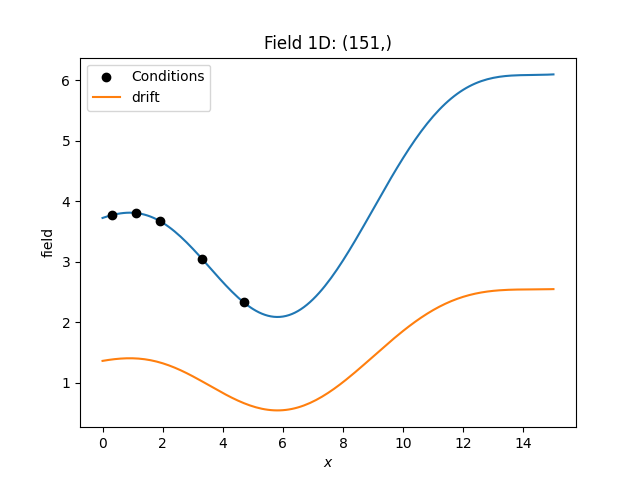
crédit Pykrige API

https://geostat-framework.readthedocs.io/projects/gstools/en/stable/examples/05_kriging/04_extdrift_kriging.html#sphx-glr-examples-05-kriging-04-extdrift-kriging-py


In [19]:
#from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import train_test_split

from pykrige.rk import RegressionKriging

On crée un objet Régression Kriging avec:

    1) Variogram model qu'on a fitter précèdemment
    2) LASSO regression model 
L'objet de Pykrige prend en intrant les objets du package gstools qui représente notre variogram model et notre LASSO regression du package sckit learn.

In [21]:
# on insère ici nos deux objets crées précèdemment.
m_rk = RegressionKriging(regression_model=lasso_best, variogram_model = fit_spherical)
#on va fitter notre regression kriging sur notre dataset d'obs et de coord
m_rk.fit(X, posi, D)

# On prédit sur notre dataset prédiction qui est bcp plus gros)
values = m_rk.predict(pred,posi_pred)
values

Finished learning regression model
Finished kriging residuals


array([0.39946781, 0.39938961, 0.39827389, ..., 0.39791379, 0.39887051,
       0.39744831])

In [20]:
# Ajout de split test
from sklearn.model_selection import train_test_split
X_train, X_test, posi_train, posi_test, D_train, D_test = train_test_split(
    X, posi, D, test_size=0.3, random_state=42 #ici on fait 30% de notre dataset pour construire dataset test avec test_size = 0.3
)

m_rk = RegressionKriging(regression_model=lasso_best, variogram_model = fit_spherical)
#on va fitter notre regression kriging sur notre dataset d'obs et de coord
m_rk.fit(X_train, posi_train, D_train) #on fite avec nos dataset train

# On prédit sur notre dataset prédiction qui est bcp plus gros)
values = m_rk.predict(pred,posi_pred)
values

Finished learning regression model
Finished kriging residuals


array([0.40524759, 0.40491745, 0.40383316, ..., 0.39695625, 0.40208445,
       0.39919699])

In [40]:
print(posi_test)
print(D_test)

[[ 451182.33429662 5676160.00786965]
 [ 451169.92944723 5676172.99910893]
 [ 451173.97823066 5676179.5409061 ]
 [ 451199.9517342  5676122.89043603]
 [ 451173.03693686 5676172.2813456 ]
 [ 451201.65066152 5676144.43047791]
 [ 451189.53235033 5676144.99850883]
 [ 451185.26918886 5676222.84321297]
 [ 451204.65093258 5676149.55243018]
 [ 451166.94254617 5676199.25479724]
 [ 451199.87349455 5676122.79387262]
 [ 451198.94161729 5676143.95908226]
 [ 451164.99616013 5676176.56643209]
 [ 451200.80530115 5676146.2170497 ]
 [ 451168.82379051 5676194.28129031]
 [ 451203.89739641 5676142.96555474]]
19    0.408
41    0.402
47    0.413
12    0.385
43    0.399
5     0.406
17    0.398
50    0.389
3     0.407
32    0.402
13    0.407
8     0.404
26    0.407
6     0.398
34    0.369
4     0.395
Name: D_slab, dtype: float64


Maintenant on veut visualiser notre dataframe de résultat en raster et l'exporter en geotiff pour faire une carte dans Qgis ou Arc.

In [21]:
# On visualise le format de tous nos output
# Il est important de comprendre leur structure pour mieux les joindre ensemble
print(posi_pred.shape)
print(values.shape)
print(pd.DataFrame(posi_pred))
print(pd.Series(values))

(40728, 2)
(40728,)
                   0             1
0      451153.604674  5.676243e+06
1      451154.106290  5.676243e+06
2      451154.607906  5.676243e+06
3      451155.109522  5.676243e+06
4      451155.611139  5.676243e+06
...              ...           ...
40723  451211.290547  5.676102e+06
40724  451211.792163  5.676102e+06
40725  451212.293779  5.676102e+06
40726  451212.795395  5.676102e+06
40727  451213.297012  5.676102e+06

[40728 rows x 2 columns]
0        0.405248
1        0.404917
2        0.403833
3        0.403732
4        0.403488
           ...   
40723    0.395499
40724    0.395204
40725    0.396956
40726    0.402084
40727    0.399197
Length: 40728, dtype: float64


In [22]:
# On a deux dataframe avec le même nombre de row.
# Reste juste à les concat ensemble dans l'axe des colonnes
df = pd.concat([pd.DataFrame(posi_pred),pd.Series(data = values)], axis =1, ignore_index=True)
posi_pred.shape
print(values.shape)

df.columns = ['x','y','pred_values']
df

(40728,)


,x,y,pred_values
0,451153.604674,5.676243e+06,0.405248
1,451154.106290,5.676243e+06,0.404917
2,451154.607906,5.676243e+06,0.403833
3,451155.109522,5.676243e+06,0.403732
4,451155.611139,5.676243e+06,0.403488
...,...,...,...
40723,451211.290547,5.676102e+06,0.395499
40724,451211.792163,5.676102e+06,0.395204
40725,451212.293779,5.676102e+06,0.396956
40726,451212.795395,5.676102e+06,0.402084


<xarray.Dataset>
Dimensions:      (y: 282, x: 157)
Coordinates:
  * y            (y) float64 5.676e+06 5.676e+06 ... 5.676e+06 5.676e+06
  * x            (x) float64 4.511e+05 4.512e+05 ... 4.512e+05 4.512e+05
    spatial_ref  int64 0
Data variables:
    pred_values  (y, x) float64 nan nan nan nan nan nan ... nan nan nan nan nan

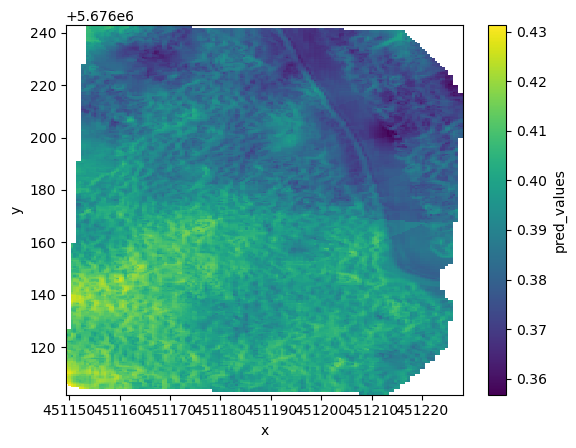

In [23]:
# Maintenant on utilise une fonction propre à pandas pour basculer en xarray
# en spécifiant l'index y et x
da = df.set_index(['y', 'x']).to_xarray()
da['pred_values'].plot()
da.rio.write_crs('epsg:26911', inplace=True)

In [25]:
print(da.rio.crs)
da.rio.to_raster('/home/francis/Documents/programmation/python/GEO71021/D_slab.tiff')

EPSG:26911


## Metric de Performance
Il est important de comparer votre modèle avec vos observations. Vous pouvez utiliser ces deux metrics de performance qui compare votre valeurs prédites par votre modèle avec vos observations terrains.

Mean-average-error
Root-Mean-square-error (RMSE)

\begin{align}
MAE = \frac{\sum_{i=1}^N (x_i - x_{i+1})}{N} \\
RMSE = \sqrt{\frac{\sum_{i=1}^{N}(x_i - x_{i+1})^2}{N}}\\
\end{align}



In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [45]:
df_test = pd.concat([pd.DataFrame(posi_test),pd.Series(data = np.array(D_test))], axis =1, ignore_index=True)
df_test.columns = ['x','y','D_test']

In [51]:
df_test = pd.concat([pd.DataFrame(posi_test),pd.Series(data = np.array(D_test))], axis =1, ignore_index=True) #regroupe notre dataset test
df_test.columns = ['x','y','D_test']

# Il faut d'abord récupérer vos données prédites à l'emplacement de vos observations. 
# Je propose la même méthode avec rioxarray
l_values = []
for index, row in df_test.iterrows(): #on parcoure notre dataset test pour trouver leur position
    xx = row['x']
    yy = row['y']
    
    values = float(da.pred_values.sel(x = xx, y = yy, method = "nearest").values)
    l_values.append(values)

mae = mean_absolute_error(df_test['D_test'],l_values)
rmse = np.sqrt(mean_squared_error(df_test['D_test'],l_values))
print('MAE = ',mae, 'm')
print('RMSE = ',rmse,'m')

MAE =  0.0083103435790962 m
RMSE =  0.009923587408836539 m


In [27]:
# Il faut d'abord récupérer vos données prédites à l'emplacement de vos observations. 
# Je propose la même méthode avec rioxarray
l_values = []
for pt in JBC22SH['geometry']:
    xx = pt.xy[0][0]
    yy = pt.xy[1][0]
    
    values = float(da.pred_values.sel(x = xx, y = yy, method = "nearest").values)
    l_values.append(values)

mae = mean_absolute_error(D,l_values)
rmse = np.sqrt(mean_squared_error(D,l_values))
print('MAE = ',mae, 'm')
print('RMSE = ',rmse,'m')

MAE =  0.006596645261646697 m
RMSE =  0.00817116049033449 m


In [41]:
df_test = pd.concat([pd.DataFrame(posi_test),pd.Series(data = np.array(D_test))], axis =1, ignore_index=True)
df_test

,0,1,2
0,451182.334297,5.676160e+06,0.408
1,451169.929447,5.676173e+06,0.402
2,451173.978231,5.676180e+06,0.413
3,451199.951734,5.676123e+06,0.385
4,451173.036937,5.676172e+06,0.399
5,451201.650662,5.676144e+06,0.406
6,451189.532350,5.676145e+06,0.398
7,451185.269189,5.676223e+06,0.389
8,451204.650933,5.676150e+06,0.407
9,451166.942546,5.676199e+06,0.402


## Discussion des résultats

Est-ce que votre RMSE et MAE représente vraiment votre erreur...

Est-ce qu'il pourrait y avoir un biais dans votre erreur...

À discuter dans votre Tp

## Process ortho thermal

In [28]:
raster_thermal = rioxarray.open_rasterio('/home/francis/Documents/UQAR/Cours/GEO71021/Tp3/thermal_canuel.tif', masked = True)
raster_thermal

<xarray.DataArray (band: 4, y: 5527, x: 7110)>
[157187880 values with dtype=float32]
Coordinates:
  * band         (band) int64 1 2 3 4
  * x            (x) float64 2.245e+05 2.245e+05 ... 2.252e+05 2.252e+05
  * y            (y) float64 5.368e+06 5.368e+06 ... 5.367e+06 5.367e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
    units:          ('metre', 'metre', 'metre', 'metre')

In [101]:
%%time
res = raster_thermal.rio.resolution()
print('resolution ',res)
upscale_factor = res[0]/0.3 #on s'en va vers une résolution de 0.5m
print('upscale_factor',upscale_factor)
new_width = int(raster_thermal.rio.width * upscale_factor)
new_height = int(raster_thermal.rio.height * upscale_factor)

thermal_resamp = raster_thermal.rio.reproject(raster_thermal.rio.crs, shape = (new_height, new_width), resampling = Resampling.cubic)
print(thermal_resamp.rio.resolution())

resolution  (0.1, -0.1000000000000337)
upscale_factor 0.33333333333333337
(0.3000000000000304, -0.3000542888165342)
CPU times: user 8.55 s, sys: 74.4 ms, total: 8.63 s
Wall time: 8.63 s


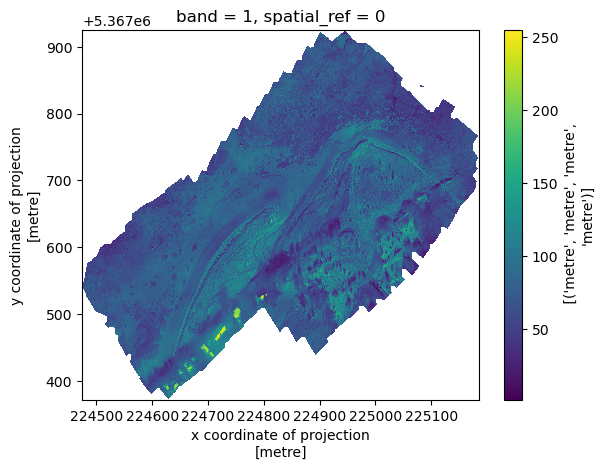

In [102]:
thermal_resamp[0].plot()

EPSG:2948


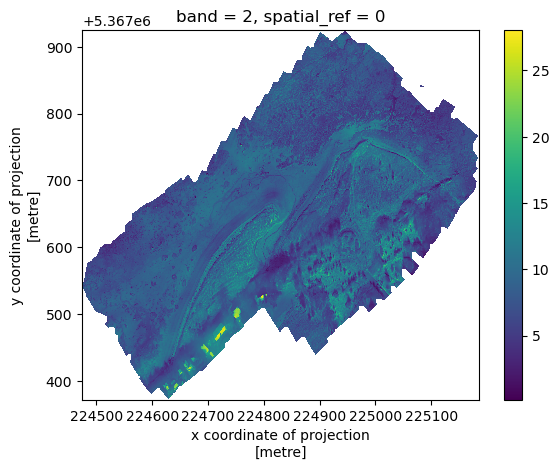

In [120]:
thermal_adj_C = (thermal_resamp)*0.11
thermal_adj_C[1].plot()
print(thermal_adj_C.rio.crs)
thermal_adj_C.rio.to_raster('/home/francis/Documents/programmation/python/GEO71021/thermal_adj.tiff')

In [114]:
canu = gpd.read_file('/home/francis/Documents/UQAR/Cours/GEO71021/Tp3/canuel_data2/canuel_data2.shp')
canu

,Name,Easting,Northing,Elevation,Longitude,Latitude,Ellipsoida,Easting RM,Northing R,Elevatio_1,...,CS name,Temp. (C),slope,tri,plan_curv,aspect,red,green,blue,geometry
0,92,225118.164,5367707.620,2.206,-68.577126,48.442974,-23.677,0.011,0.011,0.010,...,NAD83(CSRS) / MTM zone 6 + ca_nrc_HT2_2010v70.tif,8.43,0.132182,0.020406,1.253966,3.025622,211.0,166.0,116.0,POINT (225118.164 5367707.620)
1,95,225064.901,5367773.596,1.287,-68.577858,48.443560,-24.600,0.013,0.011,0.010,...,NAD83(CSRS) / MTM zone 6 + ca_nrc_HT2_2010v70.tif,5.73,0.177203,0.025361,0.333490,6.097118,107.0,88.0,82.0,POINT (225064.901 5367773.596)
2,85,225051.288,5367792.513,1.172,-68.578046,48.443729,-24.716,0.010,0.012,0.010,...,NAD83(CSRS) / MTM zone 6 + ca_nrc_HT2_2010v70.tif,1.43,0.168774,0.022805,-11.812197,0.324843,130.0,104.0,88.0,POINT (225051.288 5367792.513)
3,87,225042.191,5367800.553,1.161,-68.578170,48.443800,-24.728,0.012,0.010,0.010,...,NAD83(CSRS) / MTM zone 6 + ca_nrc_HT2_2010v70.tif,3.77,0.109389,0.018650,-8.706837,4.794896,140.0,106.0,85.0,POINT (225042.191 5367800.553)
4,90,225010.185,5367790.128,0.919,-68.578601,48.443702,-24.970,0.011,0.010,0.010,...,NAD83(CSRS) / MTM zone 6 + ca_nrc_HT2_2010v70.tif,9.37,0.040772,0.005205,4.466462,5.208236,171.0,160.0,148.0,POINT (225010.185 5367790.128)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,49,224709.361,5367581.217,2.472,-68.582627,48.441785,-23.159,0.010,0.010,0.010,...,NAD83(CSRS) / MTM zone 6 + CGVD2013(CGG2013) h...,13.20,0.013969,0.001862,-3.907352,2.477107,127.0,119.0,124.0,POINT (224709.361 5367581.217)
94,44,224698.167,5367577.007,2.073,-68.582777,48.441746,-23.558,0.011,0.011,0.010,...,NAD83(CSRS) / MTM zone 6 + CGVD2013(CGG2013) h...,11.10,0.139426,0.017782,0.383843,5.344896,161.0,157.0,156.0,POINT (224698.167 5367577.007)
95,22,224691.934,5367575.190,1.531,-68.582861,48.441729,-24.100,0.010,0.010,0.010,...,NAD83(CSRS) / MTM zone 6 + CGVD2013(CGG2013) h...,10.70,0.140253,0.017886,-4.516502,5.385321,167.0,165.0,165.0,POINT (224691.934 5367575.190)
96,54,224686.416,5367563.894,1.687,-68.582934,48.441627,-23.944,0.010,0.010,0.011,...,NAD83(CSRS) / MTM zone 6 + CGVD2013(CGG2013) h...,11.10,0.104445,0.013275,6.862809,5.363058,163.0,161.0,159.0,POINT (224686.416 5367563.894)


In [121]:
# Il faut d'abord récupérer vos données prédites à l'emplacement de vos observations. 
# Je propose la même méthode avec rioxarray
temp = canu['Temp. (C)']
l_values = []
for pt in canu['geometry']:
    xx = pt.xy[0][0]
    yy = pt.xy[1][0]
    
    values = float(thermal_adj_C[0].sel(x = xx, y = yy, method = "nearest").values)
    l_values.append(values)

mae = mean_absolute_error(temp,l_values)
rmse = np.sqrt(mean_squared_error(temp,l_values))
print('MAE = ',mae, '°C')
print('RMSE = ',rmse,'°C')

MAE =  2.567633275207208 °C
RMSE =  3.2992466538692904 °C


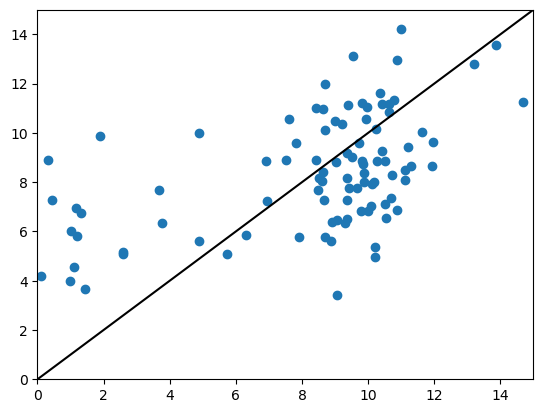

In [123]:
x = np.linspace(0,15,150)
plt.scatter(temp,l_values)
plt.plot(x,x,'k-') # identity line

plt.xlim(0,15)
plt.ylim(0,15)
plt.show()